In [1]:
# Configure Jupyter so figures appear in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
m = UNITS.meter
s = UNITS.second
kg =UNITS.kilogram

<Unit('kilogram')>

In [84]:
t_end=2e8 * s
init=State(x1=1.9e12*m,
           y1=0*m,
           vx1=0*m/s,
           vy1=0*m/s,
           x2=0*m,
           y2=0*m,
           vx2=0*m/s,
           vy2=0*m/s)
system = System(init=init, 
                m1=1.989e30*1.1*kg, 
                m2=1.989e30*kg, 
                G=6.67e-11*m*m*m/(kg*s*s), 
                t_end=t_end)

,values
init,x1 1900000000000.0 meter y1 ...
m1,2.1879e+30 kilogram
m2,1.989e+30 kilogram
G,6.67e-11 meter ** 3 / kilogram / second ** 2
t_end,200000000.0 second


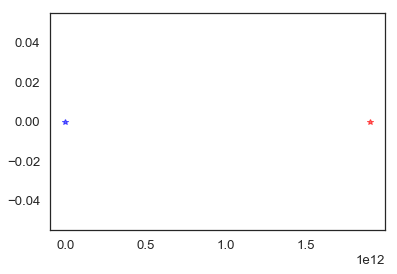

In [85]:
plot(init.x1,init.y1,'*',color='red')
plot(init.x2,init.y2,'*',color='blue')

In [106]:
def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x1,y1,vx1,vy1,x2,y2,vx2,vy2 = state
    unpack(system)
    
    r=sqrt((x1-x2)**2+(y1-y2)**2)

    force=G*m1*m2/(r**2)
    acceleration1=force/m1
    acceleration2=force/m2

    theta1=pi-np.arcsin((x2-x1)/r)
    theta2=2*pi-np.arcsin((x2-x1)/r)
    dx1dt=vx1
    dy1dt=vy1
    dx2dt=vx2
    dy2dt=vy2
    dvx1dt,dvy1dt=pol2cart(theta1,acceleration1)
    dvx2dt,dvy2dt=pol2cart(theta2,acceleration2)
#     dvx1dt=acceleration1*np.cos(theta1)
#     dvy1dt=acceleration1*np.sin(theta1)
#     dvx2dt=acceleration2*np.cos(theta2)
#     dvy2dt=acceleration2*np.sin(theta2)
    

    
    return dx1dt,dy1dt,dvx1dt,dvy1dt,dx2dt,dy2dt,dvx2dt,dvy2dt

In [107]:
t_end=1.5e8 * s
results, details = run_ode_solver(system, slope_func)
details

,values
sol,None
t_events,[]
nfev,68
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


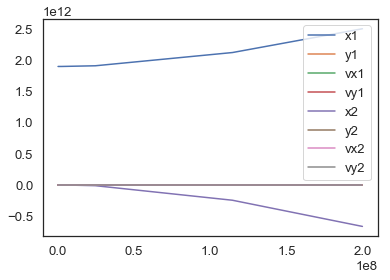

In [108]:
results.plot()

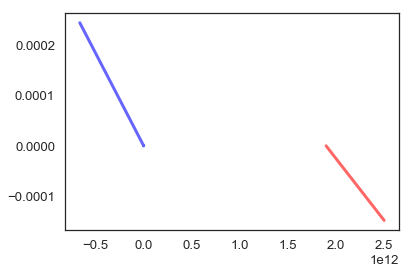

In [109]:
plot(results.x1,results.y1,'red')
plot(results.x2,results.y2,'blue')

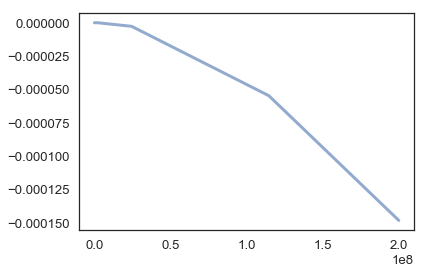

In [110]:
plot(results.index,results.y1)